In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
#读取数据并作归一化
train_input=np.loadtxt('train_input.csv',dtype=np.float32)
output=np.loadtxt('train_output.txt',dtype=np.float32)

data_train = pd.DataFrame(train_input)
data_train = scaler.fit_transform(data_train)
data_train=pd.DataFrame(data_train)

data_output = pd.DataFrame(output)
data_output = scaler.fit_transform(data_output)
data_output=pd.DataFrame(data_output)

In [22]:
#训练集data_train
data_train.describe()

,0,1,2,3,4,5,6
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,0.322107,0.305525,0.586366,0.385056,0.686711,0.636723,0.622949
std,0.117697,0.077334,0.213634,0.142155,0.110435,0.173591,0.180328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258915,0.254889,0.461105,0.259662,0.659194,0.508643,0.488976
50%,0.298229,0.303683,0.629019,0.383048,0.709249,0.686391,0.672994
75%,0.357324,0.355139,0.734439,0.475519,0.740653,0.764788,0.760008
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#训练集输出data_output
data_output.describe()

,0
count,1596.000000
mean,0.243713
std,0.140205
min,0.000000
25%,0.162410
50%,0.230348
75%,0.283353
max,1.000000


In [24]:
#测试集data_test
test_input=np.loadtxt('test_input.csv',dtype=np.float32)
data_test=pd.DataFrame(test_input)
data_test.describe()

,0,1,2,3,4,5,6
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.318162,0.671336,0.635381,0.352880,0.590518,0.505869,0.469130
std,0.110888,0.089310,0.163356,0.139398,0.143132,0.122946,0.117271
min,0.040359,0.069706,0.174480,0.000282,0.001254,0.015904,0.010062
25%,0.258632,0.667248,0.540616,0.356817,0.531069,0.431870,0.395936
50%,0.305694,0.685670,0.625669,0.364310,0.619416,0.493043,0.466510
75%,0.360664,0.702688,0.749234,0.375248,0.690804,0.570393,0.534970
max,0.978455,0.782632,0.965611,0.996916,0.897153,0.926988,0.851098


In [25]:
data_train = np.expand_dims(data_train,axis=-1)
data_train = np.array(data_train)
data_output = np.array(data_output)
data_train
data_output

array([[0.16440192],
       [0.16116911],
       [0.15759481],
       ...,
       [0.13142903],
       [0.13250434],
       [0.13575165]], dtype=float32)

In [26]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout
import time

In [27]:
#搭建1层的LSTM
model = Sequential() #layers [1,64,128,128,128,64,1]
model.add(LSTM(input_shape=(data_train.shape[1],data_train.shape[2]),
               units=64,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(input_shape=(None,50),units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation("sigmoid"))
# model.add(Activation("sigmoid"))
start = time.time()
model.compile(loss="mse", optimizer="rmsprop")

In [28]:
len(model.layers)

12

In [29]:
history = model.fit(data_train,data_output,
          batch_size=64,
          epochs = 100,
          validation_split=0.2)
print("Compilation Time : ", time.time() - start)

Epoch 1/100
20/20 [==============================] - 6s 73ms/step - loss: 0.0297 - val_loss: 0.0202
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0232 - val_loss: 0.0219

In [30]:
score = model.evaluate(data_train,data_output)
print(score)
from sklearn import metrics
data_pre = model.predict(data_train)
MSE = metrics.mean_squared_error(data_output, data_pre)
print(MSE)
RMSE = metrics.mean_squared_error(data_output, data_pre)**0.5
print(RMSE)

50/50 [==============================] - 1s 6ms/step - loss: 0.0191
0.019140101969242096
0.019140102
0.1383477573697604


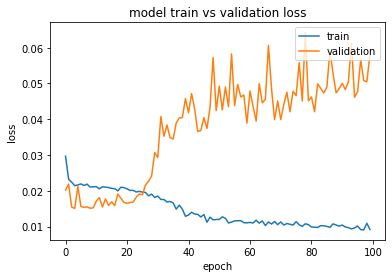

In [31]:
# 显示训练过程
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

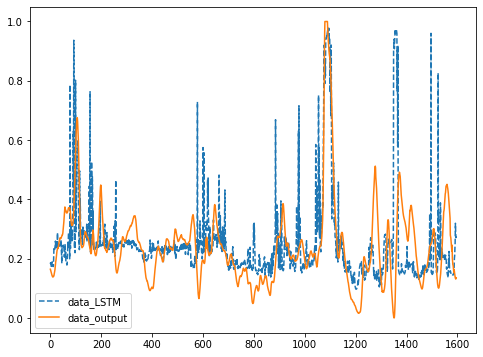

In [32]:
from matplotlib import pyplot as plt
data_output
data_pre
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(data_pre, '--', label='data_LSTM')
ax1.plot(data_output, '-',label='data_output')
ax1.legend(loc='best')

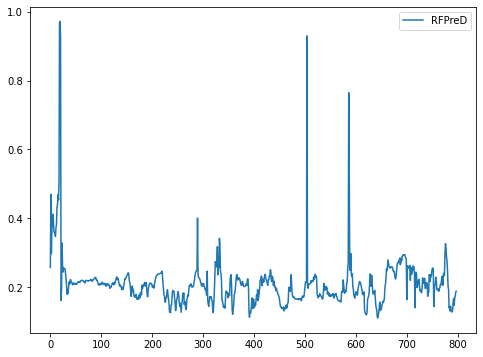

In [33]:
data_test = np.array(data_test)
data_test = np.expand_dims(data_test,axis=-1)
y_test = model.predict(data_test)
# y_test
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y_test, '-',label='RFPreD')
ax.legend(loc='best')
y_test = pd.DataFrame(y_test)
y_test.index = np.linspace(1,798,798)
y_test.to_csv("test_SP_LSTM.csv")